In [8]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 103.1/103.1 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import glob
from multiprocessing import cpu_count
from experiment_tools import *
working_path = "C:\\Users\\lassa\\OneDrive\\Desktop\\workspace\\VICTIMS_OF_FALL_MASTER_THESIS"

In [39]:
%%time
import json

#This block run all the experiments
files = glob.glob(f"{working_path}\\input_exp\\default_models\\best_models\\SVR.json")
for file in files:
    print(file)
    with open (file, "r") as f:
        data=f.read().replace('\n', '')
    splits = file.split("\\")
    experiment_name = splits[-1].split(".")[0]
    print(data)
    experiment_setup = json.loads(data)
    print(f"EXECUTION OF THE EXPERIMENT {experiment_name}")
    score = Experiment().get_holdout_predictions(working_path, "results\\default_models\\best_models", experiment_name, experiment_setup, "victims_of_fall_V2")
    


C:\Users\lassa\OneDrive\Desktop\workspace\VICTIMS_OF_FALL_MASTER_THESIS\input_exp\default_models\best_models\SVR.json
{	"dataset_settings": {							"dataset_variants": ["only_totals"], 							"type_of_labels": "floors",							"only_BMI": 1,							"total_dmg": 1						},	"task": "Regression",	"pipe" :{				"feature_extraction":"MaskedPCA(mask=mask,n_components=4)", 				"scaler" : "MinMaxScaler()",				"estimator" : "SVR()"			}}
EXECUTION OF THE EXPERIMENT SVR
only_totals
('feature_extraction', 'MaskedPCA(mask=mask,n_components=4)')
('scaler', 'MinMaxScaler()')
('estimator', 'SVR()')
[(array([[1.00000000e+00, 8.40000000e+01, 2.25781250e+01, 0.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.50000000e-01],
       [1.00000000e+00, 5.70000000e+01, 3.22037257e+01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 2.00000000e+00, 2.00000000e-01],
       [1.00000000e+00, 2.20000000e+01, 3.07394166e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000

In [40]:
y_test = score['y_test']
pred = score['pred']

In [41]:
import numpy as np 
y_test_n = np.array(y_test)
mean_results_per_floor = []
floors = []
for i in range(1,8):
    temp = np.where(y_test_n == i)[0]
    mean = np.mean(np.array(pred)[temp])
    floors.append(i)
    mean_results_per_floor.append(mean)



In [42]:
mean_results_per_floor

[2.6670407756894776,
 2.7024077480476967,
 3.529190404841316,
 4.468413757005142,
 4.737779851531698,
 5.233353968799063,
 4.7755969453397284]

Text(0.5, 0, 'Data')

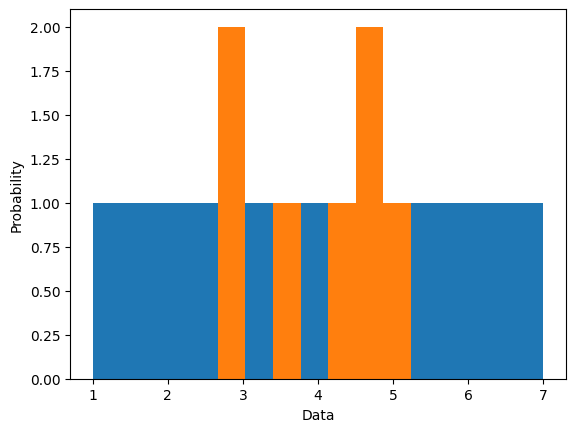

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(floors, density=False, bins=7)  # density=False would make counts
plt.hist(mean_results_per_floor, density=False, bins=7)
plt.ylabel('Probability')
plt.xlabel('Data')

In [15]:
 #This block acquire all the results obtained
import json
files = glob.glob(f"{working_path}\\results\\exp_V2\\regressors\\*.json")

filter_floor_labels = True

all_experiments_results = []
for i, file in enumerate(files):
    with open (file, "r") as f:
        
        data=f.read().replace('\n', '')
        experiment_results = json.loads(data)
        
        if type(experiment_results) == dict:
            experiment_results = [experiment_results]
            
        all_experiments_results.append(pd.DataFrame(experiment_results))

df2 = pd.concat(all_experiments_results)
df2 = df.reset_index().drop('index', axis = 1)
df2["Dataset"]="Version 2"

In [16]:
df = df2

In [17]:
filter_dict = {"task" : "Regression", "cv_type" : "n_split_inner_cv"}
target_metric = "neg_root_mean_squared_error"
filtered_df = df
for k, v in filter_dict.items():
    filtered_df = filtered_df.loc[filtered_df[k] == v]

filtered_df = filtered_df.reset_index().drop('index', axis = 1)
filtered_df = filtered_df.sort_values(by = 'mean_test_score', axis=0, ascending = False, key=lambda x: x.apply(lambda y: y[target_metric]))

In [18]:
filtered_df

,experiment_name,dataset_variant,estimator,task,hp_optimizer,cv_type,mean_test_score,mean_train_score,best_params,cv_results,experiment_setup,Dataset
19,SVR,only_totals,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.46930229921...,{'neg_root_mean_squared_error': -1.37082156750...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([1.17894363, 1.26163816, 1....",{'dataset_settings': {'dataset_variants': ['co...,Version 2
18,SVR,complete,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.47952631063...,{'neg_root_mean_squared_error': -1.35648490681...,"[{'feature_extraction__n_components': 7, 'feat...","{'fit_time': array([8.00102496, 7.89184856, 7....",{'dataset_settings': {'dataset_variants': ['co...,Version 2
13,RandomForestRegressor,only_totals,RandomForestRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.50844979605...,{'neg_root_mean_squared_error': -0.57657735465...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([14.58006907, 14.82961321, ...",{'dataset_settings': {'dataset_variants': ['co...,Version 2
7,GradientBoostingRegressor,only_totals,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.52734943387...,{'neg_root_mean_squared_error': -0.86042161685...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([6.07707119, 6.06356883, 6....",{'dataset_settings': {'dataset_variants': ['co...,Version 2
12,RandomForestRegressor,complete,RandomForestRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.52946936174...,{'neg_root_mean_squared_error': -0.57889165035...,"[{'feature_extraction__n_components': 5, 'feat...","{'fit_time': array([168.26462436, 170.26265931...",{'dataset_settings': {'dataset_variants': ['co...,Version 2
6,GradientBoostingRegressor,complete,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.53718451750...,{'neg_root_mean_squared_error': -0.80758954326...,"[{'feature_extraction__n_components': 2, 'feat...","{'fit_time': array([95.76837301, 97.54468632, ...",{'dataset_settings': {'dataset_variants': ['co...,Version 2
20,SVR,only_binary,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55255817887...,{'neg_root_mean_squared_error': -1.29308440735...,"[{'feature_extraction__n_components': 9, 'feat...","{'fit_time': array([5.86167383, 5.86567473, 5....",{'dataset_settings': {'dataset_variants': ['co...,Version 2
15,Ridge,complete,Ridge(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55362590945...,{'neg_root_mean_squared_error': -1.51464626113...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([2.32193422, 2.29338861, 2....",{'dataset_settings': {'dataset_variants': ['co...,Version 2
16,Ridge,only_totals,Ridge(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55836382817...,{'neg_root_mean_squared_error': -1.52112716397...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([0.32697487, 0.34101367, 0....",{'dataset_settings': {'dataset_variants': ['co...,Version 2
8,GradientBoostingRegressor,only_binary,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.56495680387...,{'neg_root_mean_squared_error': -0.85935779626...,"[{'feature_extraction__n_components': 2, 'feat...","{'fit_time': array([61.2008152 , 62.00695801, ...",{'dataset_settings': {'dataset_variants': ['co...,Version 2


In [11]:
filtered_df.iloc[0]["best_params"]

"[{'feature_extraction__n_components': 4, 'feature_extraction': MaskedSVD(mask=array([False, False, False,  True,  True,  True,  True,  True]))}, {'feature_extraction__n_components': 4, 'feature_extraction': MaskedPCA(mask=array([False, False, False,  True,  True,  True,  True,  True]))}, {'feature_extraction__n_components': 3, 'feature_extraction': MaskedPCA(mask=array([False, False, False,  True,  True,  True,  True,  True]))}, {'feature_extraction__n_components': 3, 'feature_extraction': MaskedPCA(mask=array([False, False, False,  True,  True,  True,  True,  True]))}, {'feature_extraction__n_components': 3, 'feature_extraction': MaskedPCA(mask=array([False, False, False,  True,  True,  True,  True,  True]))}, {'feature_extraction__n_components': 3, 'feature_extraction': MaskedPCA(mask=array([False, False, False,  True,  True,  True,  True,  True]))}, {'feature_extraction__n_components': 4, 'feature_extraction': MaskedPCA(mask=array([False, False, False,  True,  True,  True,  True,  

In [10]:
filtered_df

,experiment_name,dataset_variant,estimator,task,hp_optimizer,cv_type,mean_test_score,mean_train_score,best_params,cv_results,experiment_setup
4,GradientBoostingRegressor,only_totals,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.48638697052...,{'neg_root_mean_squared_error': -0.78933502805...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([7.99507236, 7.89643526, 8....",{'dataset_settings': {'dataset_variants': ['co...
16,SVR,only_totals,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.49756527931...,{'neg_root_mean_squared_error': -1.35482553765...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([1.16854644, 1.132514 , 1....",{'dataset_settings': {'dataset_variants': ['co...
15,SVR,complete,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.50308479387...,{'neg_root_mean_squared_error': -1.32372187839...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([7.36696649, 7.35996294, 7....",{'dataset_settings': {'dataset_variants': ['co...
10,RandomForestRegressor,only_totals,RandomForestRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.50921832972...,{'neg_root_mean_squared_error': -0.57829882827...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([17.96354413, 18.14120436, ...",{'dataset_settings': {'dataset_variants': ['co...
5,GradientBoostingRegressor,only_binary,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.52621001092...,{'neg_root_mean_squared_error': -0.77280818329...,"[{'feature_extraction__n_components': 2, 'feat...","{'fit_time': array([70.45483494, 71.39510298, ...",{'dataset_settings': {'dataset_variants': ['co...
9,RandomForestRegressor,complete,RandomForestRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.54227539264...,{'neg_root_mean_squared_error': -0.57498394792...,"[{'feature_extraction__n_components': 2, 'feat...","{'fit_time': array([194.66530895, 198.64975429...",{'dataset_settings': {'dataset_variants': ['co...
3,GradientBoostingRegressor,complete,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55618555967...,{'neg_root_mean_squared_error': -0.75897243727...,"[{'feature_extraction__n_components': 5, 'feat...","{'fit_time': array([101.13415027, 102.58157039...",{'dataset_settings': {'dataset_variants': ['co...
12,Ridge,complete,Ridge(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55671493785...,{'neg_root_mean_squared_error': -1.51298922342...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([2.20478535, 2.2283473 , 2....",{'dataset_settings': {'dataset_variants': ['co...
13,Ridge,only_totals,Ridge(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.56175979258...,{'neg_root_mean_squared_error': -1.51961595767...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([0.3367815 , 0.35078859, 0....",{'dataset_settings': {'dataset_variants': ['co...
17,SVR,only_binary,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.56263289435...,{'neg_root_mean_squared_error': -1.26966241338...,"[{'feature_extraction__n_components': 9, 'feat...","{'fit_time': array([5.66985321, 5.65543127, 5....",{'dataset_settings': {'dataset_variants': ['co...


In [6]:
filtered_df

,experiment_name,dataset_variant,estimator,task,hp_optimizer,cv_type,mean_test_score,mean_train_score,best_params,cv_results,experiment_setup
19,SVR,only_totals,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.46930229921...,{'neg_root_mean_squared_error': -1.37082156750...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([1.17894363, 1.26163816, 1....",{'dataset_settings': {'dataset_variants': ['co...
18,SVR,complete,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.47952631063...,{'neg_root_mean_squared_error': -1.35648490681...,"[{'feature_extraction__n_components': 7, 'feat...","{'fit_time': array([8.00102496, 7.89184856, 7....",{'dataset_settings': {'dataset_variants': ['co...
13,RandomForestRegressor,only_totals,RandomForestRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.50844979605...,{'neg_root_mean_squared_error': -0.57657735465...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([14.58006907, 14.82961321, ...",{'dataset_settings': {'dataset_variants': ['co...
7,GradientBoostingRegressor,only_totals,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.52734943387...,{'neg_root_mean_squared_error': -0.86042161685...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([6.07707119, 6.06356883, 6....",{'dataset_settings': {'dataset_variants': ['co...
12,RandomForestRegressor,complete,RandomForestRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.52946936174...,{'neg_root_mean_squared_error': -0.57889165035...,"[{'feature_extraction__n_components': 5, 'feat...","{'fit_time': array([168.26462436, 170.26265931...",{'dataset_settings': {'dataset_variants': ['co...
6,GradientBoostingRegressor,complete,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.53718451750...,{'neg_root_mean_squared_error': -0.80758954326...,"[{'feature_extraction__n_components': 2, 'feat...","{'fit_time': array([95.76837301, 97.54468632, ...",{'dataset_settings': {'dataset_variants': ['co...
20,SVR,only_binary,SVR(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55255817887...,{'neg_root_mean_squared_error': -1.29308440735...,"[{'feature_extraction__n_components': 9, 'feat...","{'fit_time': array([5.86167383, 5.86567473, 5....",{'dataset_settings': {'dataset_variants': ['co...
15,Ridge,complete,Ridge(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55362590945...,{'neg_root_mean_squared_error': -1.51464626113...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([2.32193422, 2.29338861, 2....",{'dataset_settings': {'dataset_variants': ['co...
16,Ridge,only_totals,Ridge(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55836382817...,{'neg_root_mean_squared_error': -1.52112716397...,"[{'feature_extraction__n_components': 4, 'feat...","{'fit_time': array([0.32697487, 0.34101367, 0....",{'dataset_settings': {'dataset_variants': ['co...
8,GradientBoostingRegressor,only_binary,GradientBoostingRegressor(),Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.56495680387...,{'neg_root_mean_squared_error': -0.85935779626...,"[{'feature_extraction__n_components': 2, 'feat...","{'fit_time': array([61.2008152 , 62.00695801, ...",{'dataset_settings': {'dataset_variants': ['co...


In [61]:
filter_dict = {"task" : "Classification", "cv_type" : "n_split_inner_cv"}
target_metric = "accuracy"
filtered_df = df
for k, v in filter_dict.items():
    filtered_df = filtered_df.loc[filtered_df[k] == v]

filtered_df = filtered_df.reset_index().drop('index', axis = 1)
filtered_df = filtered_df.sort_values(by = 'mean_test_score', axis=0, ascending = False, key=lambda x: x.apply(lambda y: y[target_metric]))

In [62]:
filtered_df

,experiment_name,dataset_variant,estimator,task,hp_optimizer,cv_type,mean_test_score,mean_train_score,best_params,cv_results,experiment_setup
11,Experiment_4_08_12_21,only_binary,RidgeClassifier(),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.834329268292683, 'f1_micro': 0....","{'accuracy': 0.8364865271714587, 'f1_micro': 0...","[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([4.79100657, 4.67100644, 4....",{'dataset_settings': {'dataset_variants': ['co...
1,Experiment_10_08_12_21,only_totals,GradientBoostingClassifier(),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8270731707317074, 'f1_micro': 0...","{'accuracy': 1.0, 'f1_micro': 1.0, 'f1_macro':...","[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([367.28800154, 328.56399894...",{'dataset_settings': {'dataset_variants': ['co...
8,Experiment_3_08_12_21,only_binary,SVC(),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8270121951219511, 'f1_micro': 0...","{'accuracy': 0.8496545235586332, 'f1_micro': 0...","[{'scaler': StandardScaler(), 'feature_extract...","{'fit_time': array([9.75400639, 9.25600171, 9....",{'dataset_settings': {'dataset_variants': ['co...
10,Experiment_4_08_12_21,only_totals,RidgeClassifier(),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8270121951219511, 'f1_micro': 0...","{'accuracy': 0.8337430377841336, 'f1_micro': 0...","[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([4.61200213, 4.54900599, 4....",{'dataset_settings': {'dataset_variants': ['co...
13,Experiment_6_08_12_21,only_totals,"XGBClassifier(C = 2, kernel='rbf')",Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.826829268292683, 'f1_micro': 0....","{'accuracy': 0.94903281649857, 'f1_micro': 0.9...","[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([83.62200212, 83.39799786, ...",{'dataset_settings': {'dataset_variants': ['co...
7,Experiment_3_08_12_21,only_totals,SVC(),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8223170731707317, 'f1_micro': 0...","{'accuracy': 0.8587038988408853, 'f1_micro': 0...","[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([9.65400243, 7.32000327, 7....",{'dataset_settings': {'dataset_variants': ['co...
5,Experiment_2_08_12_21,only_binary,RandomForestClassifier(criterion = 'entropy'),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8221341463414635, 'f1_micro': 0...","{'accuracy': 0.965418485623965, 'f1_micro': 0....","[{'feature_extraction__n_components': 3, 'feat...","{'fit_time': array([188.20398474, 196.635988 ...",{'dataset_settings': {'dataset_variants': ['co...
9,Experiment_4_08_12_21,complete,RidgeClassifier(),Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8219512195121952, 'f1_micro': 0...","{'accuracy': 0.8375839229263887, 'f1_micro': 0...","[{'scaler': StandardScaler(), 'feature_extract...","{'fit_time': array([4.66400599, 4.74100542, 5....",{'dataset_settings': {'dataset_variants': ['co...
12,Experiment_6_08_12_21,complete,"XGBClassifier(C = 2, kernel='rbf')",Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8195731707317073, 'f1_micro': 0...","{'accuracy': 0.9465301821466205, 'f1_micro': 0...","[{'scaler': StandardScaler(), 'feature_extract...","{'fit_time': array([95.43899751, 91.56899929, ...",{'dataset_settings': {'dataset_variants': ['co...
14,Experiment_6_08_12_21,only_binary,"XGBClassifier(C = 2, kernel='rbf')",Classification,RandomizeSearchCV,n_split_inner_cv,"{'accuracy': 0.8146341463414635, 'f1_micro': 0...","{'accuracy': 0.9116107180490742, 'f1_micro': 0...","[{'scaler': StandardScaler(), 'feature_extract...","{'fit_time': array([95.94899964, 94.87499619, ...",{'dataset_settings': {'dataset_variants': ['co...


In [11]:
from numpy import array
#THIS IS USED TO EXPLODE THE DICT OF THE SCORES AS COLUMNS OF THE RESULTED FILTERED_DF
values = {}
df_table = filtered_df[:0]
estimators = {}
for index, record in filtered_df.iterrows():
    cv_result = record.cv_results

    i_scoring = cv_result.rfind("scoring")
    i_test = cv_result[i_scoring:].find("'test")
    cv_result = "{"+cv_result[i_scoring+i_test:]
    cv_result = eval(cv_result)
    
    for k, list_scores in cv_result.items():
        if values.get(k) == None:
            values[k] = []
        mean = np.round(np.mean(np.abs(list_scores)), 2)
        std = np.round(np.std(np.abs(list_scores)), 2)
        
        values[k].append(str(mean)+" (std. "+str(std)+")")
    
for k, v in values.items():
    filtered_df[k] = v

In [12]:
#THIS IS USED TO EXPLODE THE DICT OF THE SCORES AS COLUMNS OF THE RESULTED FILTERED_DF
values = {}
for record in filtered_df.mean_test_score:
    for k, v in record.items():
        if values.get(k) == None:
            values[k] = []
        values[k].append(v)

for k, v in values.items():
    filtered_df[k] = v

In [65]:
names = {'dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_accuracy': 'Accuracy'}
df_table = filtered_df.filter(['dataset_variant', 'estimator', 'test_accuracy'])
df_table = df_table.rename(columns = names)

df_table.Model = df_table.Model.apply(lambda x: x if x.find('(') == -1 else x[:x.find('(')])
filtered_table = df_table[:0]
estimators = {}
for index, row in df_table.iterrows():
    if estimators.get(row.Model) == None:
        estimators[row.Model] = 1
        filtered_table = filtered_table.append(row)
        

In [66]:
filtered_table

,Dataset variant,Model,Accuracy
11,only_binary,RidgeClassifier,0.83 (std. 0.04)
1,only_totals,GradientBoostingClassifier,0.83 (std. 0.04)
8,only_binary,SVC,0.83 (std. 0.03)
13,only_totals,XGBClassifier,0.83 (std. 0.08)
5,only_binary,RandomForestClassifier,0.82 (std. 0.04)
15,complete,DecisionTreeClassifier,0.79 (std. 0.06)


In [30]:
filtered_table.to_latex("classification.txt")

In [14]:
names = {'dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_neg_root_mean_squared_error': 'RMSE', 'test_r2': 'R squared', 'test_neg_mean_absolute_error' : 'MAE'}
df_table = filtered_df.filter(['dataset_variant', 'estimator', 'test_neg_root_mean_squared_error', 'test_r2', 'test_neg_mean_absolute_error'])
df_table = df_table.rename(columns = names)
display(df_table)
df_table.Model = df_table.Model.apply(lambda x: x if x.find('(') == -1 else x[:x.find('(')])
filtered_table = df_table[:0]
estimators = {}
for index, row in df_table.iterrows():
    if estimators.get(row.Model) == None:
        estimators[row.Model] = 1
        filtered_table = filtered_table.append(row)
        pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

,Dataset variant,Model,RMSE,R squared,MAE
4,only_totals,GradientBoostingRegressor(),1.49 (std. 0.21),0.42 (std. 0.16),1.16 (std. 0.17)
16,only_totals,SVR(),1.5 (std. 0.25),0.41 (std. 0.2),1.18 (std. 0.2)
15,complete,SVR(),1.5 (std. 0.23),0.41 (std. 0.18),1.19 (std. 0.19)
10,only_totals,RandomForestRegressor(),1.51 (std. 0.22),0.41 (std. 0.17),1.19 (std. 0.17)
5,only_binary,GradientBoostingRegressor(),1.53 (std. 0.18),0.4 (std. 0.14),1.2 (std. 0.17)
9,complete,RandomForestRegressor(),1.54 (std. 0.21),0.38 (std. 0.18),1.2 (std. 0.17)
3,complete,GradientBoostingRegressor(),1.56 (std. 0.22),0.37 (std. 0.18),1.24 (std. 0.17)
12,complete,Ridge(),1.56 (std. 0.17),0.37 (std. 0.13),1.25 (std. 0.14)
13,only_totals,Ridge(),1.56 (std. 0.16),0.37 (std. 0.13),1.26 (std. 0.14)
17,only_binary,SVR(),1.56 (std. 0.22),0.36 (std. 0.18),1.23 (std. 0.19)


AttributeError: 'DataFrame' object has no attribute 'append'

In [60]:
filtered_table

,Dataset variant,Model,RMSE,R squared,MAE
3,complete,GradientBoostingRegressor,1.54 (std. 0.14),0.38 (std. 0.11),1.24 (std. 0.1)
11,only_binary,Ridge,1.55 (std. 0.14),0.38 (std. 0.11),1.24 (std. 0.09)
12,complete,SVR,1.55 (std. 0.14),0.37 (std. 0.11),1.22 (std. 0.11)
1,only_totals,RandomForestRegressor,1.55 (std. 0.17),0.37 (std. 0.14),1.23 (std. 0.15)
6,complete,DecisionTreeRegressor,1.71 (std. 0.14),0.24 (std. 0.13),1.4 (std. 0.12)


In [89]:
filtered_table.to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} & Dataset variant &                      Model &              RMSE &         R squared &               MAE \\\\\n\\midrule\n7  &     only\\_totals &      RandomForestRegressor &  1.47 (std. 0.23) &  0.43 (std. 0.18) &  1.16 (std. 0.17) \\\\\n12 &        complete &  GradientBoostingRegressor &  1.51 (std. 0.18) &  0.41 (std. 0.15) &  1.23 (std. 0.14) \\\\\n33 &        complete &                        SVR &   1.54 (std. 0.2) &  0.39 (std. 0.16) &  1.21 (std. 0.16) \\\\\n25 &     only\\_totals &                      Ridge &  1.54 (std. 0.17) &  0.38 (std. 0.14) &  1.23 (std. 0.14) \\\\\n20 &     only\\_binary &      DecisionTreeRegressor &  1.65 (std. 0.18) &  0.29 (std. 0.15) &  1.35 (std. 0.15) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [191]:
names = {'dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_accuracy': 'Accuracy'}
df_table = filtered_df.filter(['dataset_variant', 'estimator', 'test_accuracy'])
df_table = df_table.rename(columns = names)

name_model = "ChainedEstimator"
filtered_table = df_table[:0]
estimators = {}
for index, row in df_table.iterrows():

    if estimators.get(row.Model) == None and name_model in row.Model:
        str_regressor = 'regressor = '
        i_regressor = row.Model.find('regressor = ')
        i_comma = row.Model.find(',')

        regressor = row.Model[i_regressor+len(str_regressor):i_comma]
        i_p = regressor.find('(')
        regressor = regressor[:i_p]
        row['Regressor'] = regressor
        
        str_clf = 'clf = '
        i_clf = row.Model.find(str_clf)
        clf = row.Model[i_clf+len(str_clf):]
        i_p = clf.find('(')
        clf = clf[:i_p]
        row['Classifier'] = clf
        print(regressor)
        print(clf)

        estimators[row.Model] = 1
        filtered_table = filtered_table.append(row)
        

RandomForestClassifier
RidgeClassifier
RandomForestRegressor
SVC
GradientBoostingRegressor
SVC
RandomForestRegressor
DecisionTreeClassifier


In [193]:
filtered_table.to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} & Dataset variant &                                              Model &          Accuracy &              Classifier &                  Regressor \\\\\n\\midrule\n70 &     only\\_totals &  ChainedEstimator(regressor = RandomForestClass... &  0.29 (std. 0.06) &         RidgeClassifier &     RandomForestClassifier \\\\\n79 &     only\\_totals &  ChainedEstimator(regressor = RandomForestRegre... &  0.28 (std. 0.06) &                     SVC &      RandomForestRegressor \\\\\n82 &     only\\_totals &  ChainedEstimator(regressor = GradientBoostingR... &  0.26 (std. 0.06) &                     SVC &  GradientBoostingRegressor \\\\\n4  &     only\\_totals &  ChainedEstimator(regressor = RandomForestRegre... &  0.26 (std. 0.05) &  DecisionTreeClassifier &      RandomForestRegressor \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
    """i_x = row.Model.find('(')
    temp_row = row.Model[i_x+1:]
    i_x = temp_row.find('(')
    temp_row = temp_row[:i_x]
    i_x = temp_row.find('=')
    temp_row = temp_row[i_x+1:]
    i_x = temp_row.find('regressor')"""

In [156]:
filtered_table.to_latex()

'\\begin{tabular}{llll}\n\\toprule\n{} & Dataset variant &                    Model &          Accuracy \\\\\n\\midrule\n39 &        complete &                      SVC &  0.18 (std. 0.04) \\\\\n23 &     only\\_binary &   DecisionTreeClassifier &  0.18 (std. 0.05) \\\\\n49 &     only\\_totals &          RidgeClassifier &  0.17 (std. 0.03) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [145]:
filtered_table.to_latex() #OneVsRestClassifier

'\\begin{tabular}{llll}\n\\toprule\n{} & Dataset variant &                   Model &          Accuracy \\\\\n\\midrule\n38 &     only\\_binary &           XGBClassifier &  0.36 (std. 0.08) \\\\\n18 &        complete &                     SVC &   0.34 (std. 0.1) \\\\\n54 &        complete &  DecisionTreeClassifier &  0.31 (std. 0.06) \\\\\n16 &     only\\_totals &         RidgeClassifier &   0.3 (std. 0.04) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [148]:
filtered_table.to_latex() #OneVsOneClassifier

'\\begin{tabular}{llll}\n\\toprule\n{} & Dataset variant &                   Model &          Accuracy \\\\\n\\midrule\n45 &        complete &           XGBClassifier &  0.35 (std. 0.07) \\\\\n31 &     only\\_totals &                     SVC &  0.35 (std. 0.08) \\\\\n61 &     only\\_totals &  DecisionTreeClassifier &  0.34 (std. 0.11) \\\\\n27 &        complete &         RidgeClassifier &  0.32 (std. 0.09) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [150]:
filtered_table.to_latex() #OneVsOneClassifier

'\\begin{tabular}{llll}\n\\toprule\n{} & Dataset variant &                               Model &          Accuracy \\\\\n\\midrule\n39 &        complete &                                 SVC &  0.18 (std. 0.04) \\\\\n23 &     only\\_binary &  estimator = DecisionTreeClassifier &  0.18 (std. 0.05) \\\\\n49 &     only\\_totals &                     RidgeClassifier &  0.17 (std. 0.03) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [117]:
best_results = filtered_df.iloc[0]
cv_result = best_results.cv_results.replace("\n",'')
cv_result = cv_result.replace(" ", '')
try:
    cv_dic = eval(best_results.cv_results)
except:
    i_scoring = cv_result.rfind("scoring")
    i_test = cv_result[i_scoring:].find("'test")
    cv_result = "{"+cv_result[i_scoring+i_test:]
metrics = best_results.experiment_setup['hp_optimizer']['metrics']
for metric in metrics:
    print(cv_dic[f"test_{metric}"])
    print(cv_dic[f"train_{metric}"])

NameError: name 'cv_dic' is not defined

In [179]:
best_results.experiment_setup

{'dataset_settings': {'dataset_variants': ['complete',
   'only_totals',
   'only_binary'],
  'type_of_labels': 'floors',
  'only_BMI': 1},
 'task': 'Regression',
 'pipe': {'feature_extraction': 'GroupedSVD(mask=mask)',
  'scaler': 'MinMaxScaler()',
  'estimator': "RandomForestRegressor(criterion = 'squared_error')"},
 'hp_optimizer': {'type': 'RandomizeSearchCV',
  'n_iter': 100,
  'params': [{'feature_extraction__n_components': '[1, 2, 3]',
    'estimator__n_estimators': '[100, 200, 250]',
    'estimator__max_depth': '[10, 15]',
    'estimator__max_features': "['sqrt', 'log2']"}],
  'metrics': ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error'],
  'n_split_outer_cv': 10,
  'n_split_inner_cv': 10}}

In [177]:
eval(best_results.best_params)[1]

{'feature_extraction__n_components': 2,
 'estimator__n_estimators': 200,
 'estimator__max_features': 'sqrt',
 'estimator__max_depth': 10}

In [20]:
filtered_df['best_params'][25]

"[{'feature_extraction__n_components': 2, 'estimator__n_estimators': 250, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 200, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 200, 'estimator__max_features': 'log2', 'estimator__max_depth': 10}, {'feature_extraction__n_components': 1, 'estimator__n_estimators': 200, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 250, 'estimator__max_features': 'log2', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 200, 'estimator__max_features': 'log2', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 1, 'estimator__n_estimators': 200, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}, {'feature_extraction__n_components': 2, 'estim

In [19]:
filtered_df['estimator'][25]

"RandomForestRegressor(criterion = 'squared_error')"

In [121]:
filtered_df.iloc[2].best_params

"[{'feature_extraction__n_components': 4, 'estimator__tol': 0.0001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 1e-05, 'estimator__C': 0.5}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.001, 'estimator__C': 0.5}, {'feature_extraction__n_components': 5, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.01, 'estimator__C': 1.0}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.001, 'estimator__C': 0.5}, {'feature_extraction__n_components': 5, 'estimator__tol': 0.0001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.001, 'estimator__C': 0.5}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.01, 'estimator__C': 0.5}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.0001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 1e-05, 'estimator_